In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"
df = pd.read_csv(path)

In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
%%capture
! pip install ipywidgets

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

In [9]:
y_data = df['price']

In [10]:
x_data = df.drop('price', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  21
number of training samples:  180


In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("number of test samples: ", x_test1.shape[0])
print("number of training samples: ", x_train1.shape[0])

number of test samples:  81
number of training samples:  120


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lre = LinearRegression()

In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [16]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=1)

lre2 = LinearRegression()
lre2.fit(x_train1[['horsepower']], y_train1)
lre2.score(x_test1[['horsepower']], y_test1)

0.6111827529454426

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
print("The mean of the folds are ", Rcross.mean(), "and the standard deviation is ", Rcross.std())

The mean of the folds are  0.522009915042119 and the standard deviation is  0.2911839444756029


In [23]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [24]:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [27]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [28]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [29]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

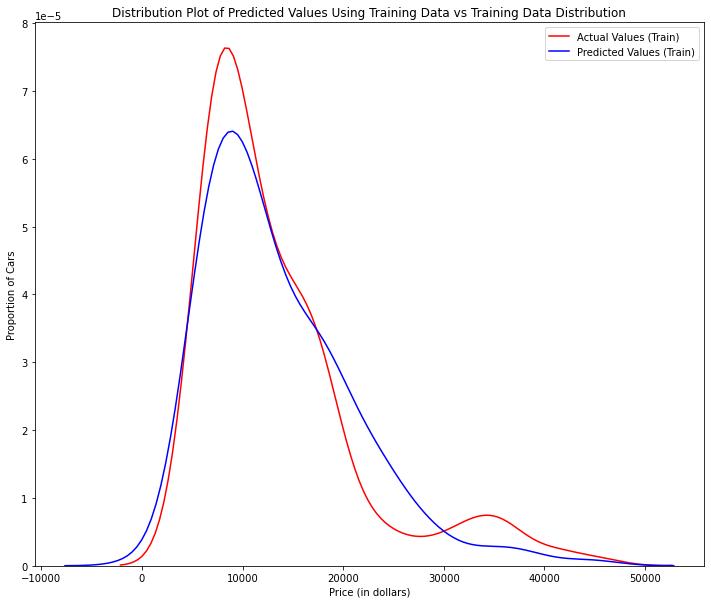

In [31]:
Title = 'Distribution Plot of Predicted Values Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

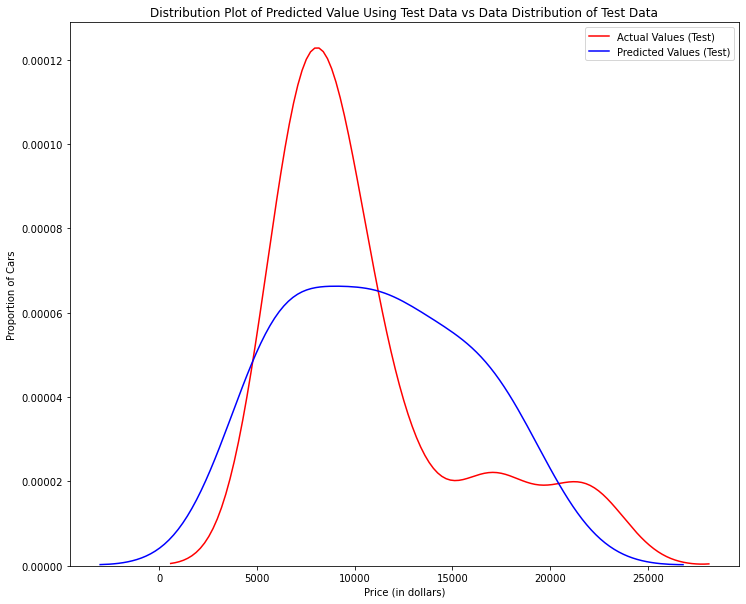

In [32]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [38]:
print("Predicted values: ", yhat[0:4])
print("True values: ", y_test[0:4].values)

Predicted values:  [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values:  [ 6295. 10698. 13860. 13499.]


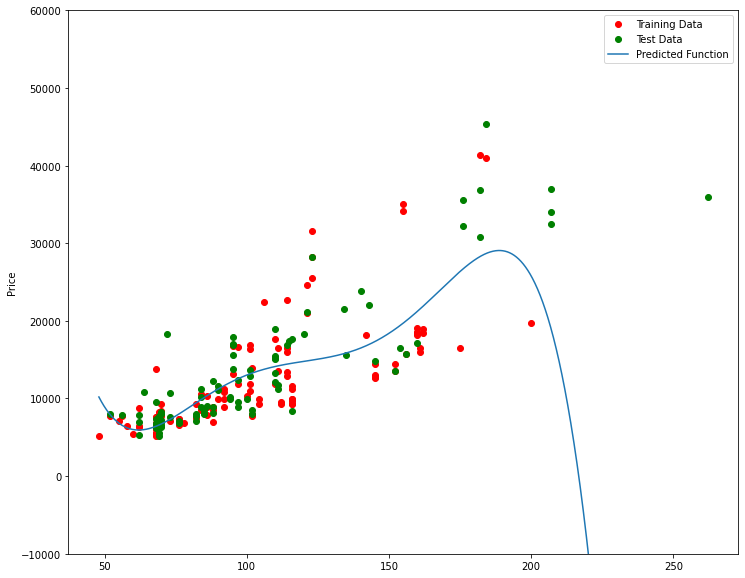

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [40]:
poly.score(x_train_pr, y_train)

0.5567716899817778

In [41]:
poly.score(x_test_pr, y_test)

-29.871838229908324

Text(3, 0.75, 'Maximum R^2 ')

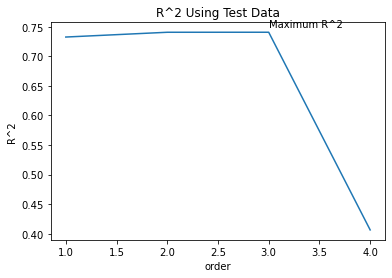

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [45]:
pr1 = PolynomialFeatures(degree=2)

In [46]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [47]:
x_train_pr1.shape

(110, 15)

In [48]:
poly1 = LinearRegression()

poly1.fit(x_train_pr1, y_train)

LinearRegression()

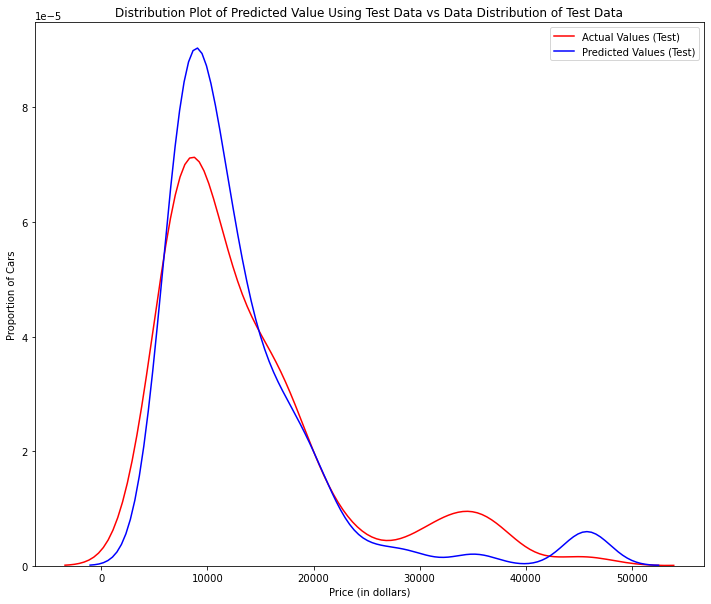

In [49]:
yhat_test1 = poly1.predict(x_test_pr1)

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

## Ridge Regression

In [50]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [51]:
from sklearn.linear_model import Ridge

In [65]:
RigeModel = Ridge(alpha=1)

In [66]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [69]:
yhat = RigeModel.predict(x_test_pr)

In [70]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [77]:
from tqdm.notebook import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

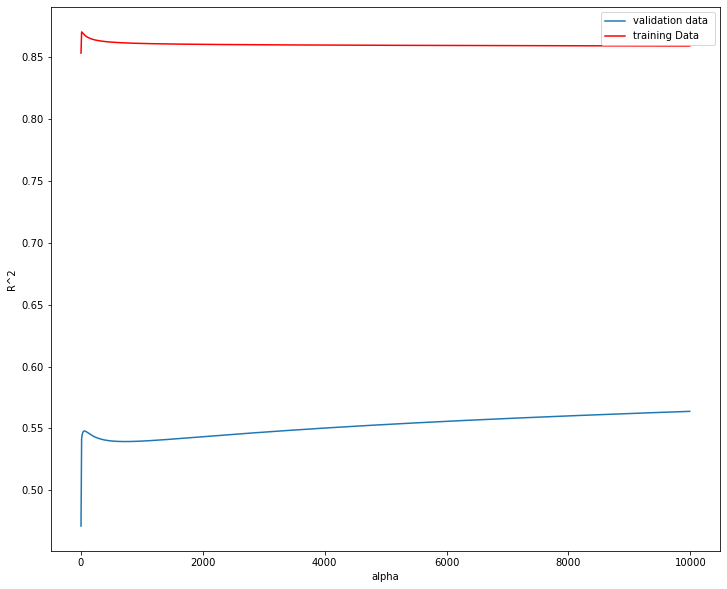

In [79]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data ')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend();

In [82]:
RigeModel1 = Ridge(alpha=10)

RigeModel1.fit(x_train_pr, y_train)
RigeModel1.score(x_test_pr, y_test)

0.5418576440207541

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [88]:
RR=Ridge()
RR

Ridge()

In [89]:
Grid1 = GridSearchCV(RR, parameters1, cv=4, iid=None)

In [90]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\tawan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=Ridge(), iid=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [91]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [92]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [96]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize':[True,False]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4, iid=None)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
Grid2.best_estimator_

C:\Users\tawan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Ridge(alpha=0.1, normalize=True)